In [74]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow_datasets as tfds
import librosa
from urllib.parse import urljoin

from IPython.display import Audio

In [75]:
import numpy as np

def add_noise(signal):
    noise = np.random.normal(0, signal.std(), signal.size)
    noise_strength = np.random.uniform(0.0, 0.3)
    augmented_signal = signal + noise * noise_strength
    return augmented_signal


In [76]:
import librosa

def pitch_shift (signal, sr):
    steps = np.random.uniform(-2, 2)
    return librosa.effects.pitch_shift(signal, sr=sr, n_steps=steps)

In [77]:
MFCC_NUM = 128

In [78]:
directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
data = pd.read_csv("../archive/sanitised_data.csv")
data["Wav_path"] = data["Wav_path"].apply(lambda x: os.path.join(directory,x))



def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            # load all audio files as a floating point time series (amplitude over time)
            # returns audio time series (x) and sampling rate (sr)
            signal, sr = librosa.load(record['Wav_path'])

            augmented_signal = add_noise(pitch_shift(signal, sr))
            
            # this extracts the first 128 Mel-frequency cepstral coefficients (MFCCs)
            # MFCC is a scale that relates the perceived frequency of a tone to the actual measured frequency
            # it scales the frequency in order to match more closely what the human ear can hear
            # results in 128 coefficients which are the weights given to the cepstral classifiers
            mean_mfcc = np.mean(librosa.feature.mfcc(y=augmented_signal, sr=sr, n_mfcc=MFCC_NUM),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['Is_dysarthria']

    return dataf

dataframe_1 = feature_extraction(data)
dataframe_1.to_csv("coeffs_1.csv", index=False, mode = "w", header = True)

 19%|█▉        | 838/4316 [00:35<01:42, 34.03it/s]C:\Users\wonuo\AppData\Local\Temp\ipykernel_39100\889477784.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(record['Wav_path'])
C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 98%|█████████▊| 4224/4316 [02:59<00:04, 19.92it/s]C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
 98%|█████████▊| 4251/4316 [03:00<00:03, 20.18it/s]C:\Users\wonuo\AppData\Local\Packages\PythonSoftware

In [79]:
dataframe_1 = pd.read_csv("coeffs_1.csv")

In [80]:
dataframe_1

0          1          2          3          4          5  \
0    -137.567404  32.433066  15.086487  11.306554  10.370637   5.793062   
1    -181.801372  69.558959  17.739317  12.713076  13.918750   6.253923   
2    -295.348222  49.305771  21.542314  13.219513   3.338098   9.145208   
3    -185.423814  74.622612  22.004898  17.202707  14.228735   6.690490   
4    -225.243927  42.730515  16.600439  11.276601   8.970044  10.291901   
...          ...        ...        ...        ...        ...        ...   
4309 -218.958854  18.795701   4.413550   4.972390   4.767712   0.235806   
4310 -187.932202  21.435308   8.615731   5.701301   5.120617   0.507837   
4311 -216.024132  16.414662   7.673939   6.903896   5.651853   2.311500   
4312 -274.887551  24.327548   7.243458  12.933073  14.806563   9.965992   
4313 -399.340423  89.266849   1.726240  36.074295  13.860129  14.608909   

              6          7          8         9  ...       119       120  \
0      3.286596   4.153964   1.134352 -1.166007  ...  0.145980  0.588350   
1     -0.242480   6.323569   2.565021 -2.041340  ...  0.321298 -0.572506   
2     13.128659  17.467856  12.130675  9.162639  ... -0.833628  0.370539   
3      4.712071   5.805643  -0.237624  3.210759  ...  0.412780  0.361954   
4      7.442590   9.308706   9.431011  7.232032  ...  1.131435 -0.484540   
...         ...        ...        ...       ...  ...       ...       ...   
4309  -1.606645  -0.826896  -2.597379 -2.018934  ...  0.094319  0.276297   
4310  -2.744616  -2.321149  -2.599652 -2.870559  ...  0.388343  0.189365   
4311   0.656104   0.028945  -1.416765 -1.980548  ...  0.322114  0.152999   
4312  -3.763412  -2.355006   1.319799 -1.794047  ... -0.070207 -0.223487   
4313 -12.699262  10.682127  -6.972962 -5.350973  ...  0.748443  0.309768   

           121       122       123       124       125       126       127  \
0     0.634164  0.241459 -0.146366 -0.447475 -0.452620 -0.305328 -0.223055   
1    -0.834781 -0.122296  0.607690  0.392506 -0.296182 -0.550006 -0.524372   
2     1.725884  1.108743 -0.523341 -1.307211 -0.457025  0.934687  1.289462   
3     0.500852  0.324813  0.093838 -0.014655  0.072293  0.243129  0.408997   
4    -0.788109  0.589697  1.510524  0.691520  0.185760 -0.926398 -1.188677   
...        ...       ...       ...       ...       ...       ...       ...   
4309  0.261742  0.231656 -0.036507  0.013653  0.201777  0.209467 -0.031921   
4310 -0.120594  0.190767  0.222808 -0.088030  0.071891 -0.137799 -0.145090   
4311  0.075073  0.128488  0.360877  0.523725 -0.188982 -0.029384  0.099157   
4312 -0.223735 -0.122036 -0.049844  0.211747  0.156132  0.042671 -0.095927   
4313 -0.218074  0.218456  0.327812  0.293729 -0.177065 -0.260380 -0.168370   

      class  
0        No  
1        No  
2        No  
3        No  
4        No  
...     ...  
4309    Yes  
4310    Yes  
4311    Yes  
4312    Yes  
4313    Yes  

[4314 rows x 129 columns]

In [81]:
def feature_extraction_v2():
	path ="C:/Users/wonuo/Downloads/EasyCall/EasyCall"
	features = []
	classes = []


	for root, dirs, files in os.walk(path):
		for file in files:
			if(file.endswith(".wav")):
				audio_class = ""
				audio_path = str(os.path.join(root,file))
				
				if ("fc" in audio_path) or ("mc" in audio_path):
					audio_class = "no"
				else:
					audio_class = "yes"
				
				try:
					# load all audio files as a floating point time series (amplitude over time)
					# returns audio time series (x) and sampling rate (sr)
					signal, sr = librosa.load(audio_path)
					
					augmented_signal = add_noise(pitch_shift(signal, sr))

					
					# this extracts the first 128 Mel-frequency cepstral coefficients (MFCCs)
					# MFCC is a scale that relates the perceived frequency of a tone to the actual measured frequency
					# it scales the frequency in order to match more closely what the human ear can hear
					# results in 128 coefficients which are the weights given to the cepstral classifiers
					mean_mfcc = np.mean(librosa.feature.mfcc(y=augmented_signal, sr=sr, n_mfcc=MFCC_NUM),axis=1)
					features.append(mean_mfcc)
					classes.append(audio_class)
				except EOFError:
					pass
	
	print(classes)
	dataf = pd.DataFrame(features)
	dataf['class'] = classes

	return dataf

dataframe_2 = feature_extraction_v2()

C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=441
  warnings.warn(
C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1764
  warnings.warn(
C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323

['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'

In [82]:
dataframe_2 = pd.read_csv("coeffs_2.csv")

In [83]:
dataframe_2

0           1          2          3          4          5  \
0     -553.08150  134.618180  27.926285  33.338130  26.819748 -11.545604   
1     -556.61130  116.633500  18.503810  20.571901  19.539720  -9.912904   
2     -541.65160  123.507150   6.886977  16.875870  24.273762  -7.576410   
3     -596.11610  148.439790 -25.842090   8.071295  23.973286 -18.156572   
4     -508.64978  133.219680  33.923286  19.460623  10.860687 -14.223286   
...          ...         ...        ...        ...        ...        ...   
21381 -477.33050  143.044660  -8.033089   7.872502  30.845726  -6.719163   
21382 -216.89868  170.399660 -65.371750  -6.452887  29.911654 -26.605038   
21383 -493.58502  128.864700  -6.309064  10.326509  22.554580 -18.968643   
21384 -523.32654  116.303116  -5.035143   3.055563  18.596800  -8.811846   
21385 -463.65704  118.299350 -17.652525  -3.851510  20.747684  -7.983196   

               6          7          8          9  ...       119       120  \
0      -9.921981  -6.358810 -15.415647  -7.359165  ...  0.023776 -0.052648   
1      -8.358273  -3.745654 -10.895887  -5.774240  ... -0.083175 -0.106960   
2      -7.561583  -5.049334 -13.634186  -5.240384  ... -0.092628 -0.403217   
3      -4.360372  -0.988325 -16.006310  -1.138308  ...  0.240448 -0.465471   
4     -10.917622  -6.961311 -14.046020  -7.280954  ... -0.097327 -0.217949   
...          ...        ...        ...        ...  ...       ...       ...   
21381 -15.584720 -10.292048 -16.780746 -11.807187  ...  0.171848  0.374559   
21382 -13.657411  -6.553598 -24.500212  -7.408497  ... -0.194014  0.226533   
21383 -12.691218   1.606819 -20.713339 -21.048704  ... -0.430890 -0.182379   
21384  -9.699737  -5.687741 -19.297226 -15.260043  ...  0.083096  0.437966   
21385 -13.714446  -9.606926 -19.215443 -14.199694  ...  0.270438 -0.073610   

            121       122       123       124       125       126       127  \
0     -0.001355  0.182418  0.231016  0.216946  0.023456 -0.061694  0.102894   
1     -0.078079  0.128683  0.235239  0.087990  0.031161 -0.156344 -0.381122   
2     -0.403009 -0.082487 -0.146527 -0.273445 -0.002673 -0.036347 -0.308101   
3     -0.038891  0.248340 -0.238563  0.089490 -0.051072 -0.562188 -0.115645   
4     -0.195297  0.124688  0.040645 -0.202251  0.091057  0.409821  0.263585   
...         ...       ...       ...       ...       ...       ...       ...   
21381  0.067638 -0.087935  0.197793  0.463783  0.520029  0.292800 -0.010918   
21382 -0.152004 -0.078213  0.333044 -0.307016 -0.046789  0.521549 -0.127988   
21383 -0.282013 -0.299295  0.320452  0.547610 -0.086934 -0.378915 -0.075547   
21384  0.242241 -0.042349 -0.113153 -0.103200  0.264549  0.399603  0.034635   
21385 -0.054191  0.300400  0.231603 -0.333922 -0.531725  0.009285  0.406002   

       class  
0        yes  
1        yes  
2        yes  
3        yes  
4        yes  
...      ...  
21381     no  
21382     no  
21383     no  
21384     no  
21385     no  

[21386 rows x 129 columns]

In [84]:
signal, sr = librosa.load(data.iloc[1]["Wav_path"])
Audio(data=signal, rate=sr)

In [85]:
augmented_signal = add_noise(signal)
Audio(data=augmented_signal, rate=sr)

In [86]:
shifted_signal = pitch_shift(signal, sr)
Audio(data=shifted_signal, rate=sr)

In [87]:
dataframe = pd.concat([dataframe_1, dataframe_2])

In [88]:
dataframe

0           1          2          3          4          5  \
0     -137.567404   32.433066  15.086487  11.306554  10.370637   5.793062   
1     -181.801372   69.558959  17.739317  12.713076  13.918750   6.253923   
2     -295.348222   49.305771  21.542314  13.219513   3.338098   9.145208   
3     -185.423814   74.622612  22.004898  17.202707  14.228735   6.690490   
4     -225.243927   42.730515  16.600439  11.276601   8.970044  10.291901   
...           ...         ...        ...        ...        ...        ...   
21381 -477.330500  143.044660  -8.033089   7.872502  30.845726  -6.719163   
21382 -216.898680  170.399660 -65.371750  -6.452887  29.911654 -26.605038   
21383 -493.585020  128.864700  -6.309064  10.326509  22.554580 -18.968643   
21384 -523.326540  116.303116  -5.035143   3.055563  18.596800  -8.811846   
21385 -463.657040  118.299350 -17.652525  -3.851510  20.747684  -7.983196   

               6          7          8          9  ...       119       120  \
0       3.286596   4.153964   1.134352  -1.166007  ...  0.145980  0.588350   
1      -0.242480   6.323569   2.565021  -2.041340  ...  0.321298 -0.572506   
2      13.128659  17.467856  12.130675   9.162639  ... -0.833628  0.370539   
3       4.712071   5.805643  -0.237624   3.210759  ...  0.412780  0.361954   
4       7.442590   9.308706   9.431011   7.232032  ...  1.131435 -0.484540   
...          ...        ...        ...        ...  ...       ...       ...   
21381 -15.584720 -10.292048 -16.780746 -11.807187  ...  0.171848  0.374559   
21382 -13.657411  -6.553598 -24.500212  -7.408497  ... -0.194014  0.226533   
21383 -12.691218   1.606819 -20.713339 -21.048704  ... -0.430890 -0.182379   
21384  -9.699737  -5.687741 -19.297226 -15.260043  ...  0.083096  0.437966   
21385 -13.714446  -9.606926 -19.215443 -14.199694  ...  0.270438 -0.073610   

            121       122       123       124       125       126       127  \
0      0.634164  0.241459 -0.146366 -0.447475 -0.452620 -0.305328 -0.223055   
1     -0.834781 -0.122296  0.607690  0.392506 -0.296182 -0.550006 -0.524372   
2      1.725884  1.108743 -0.523341 -1.307211 -0.457025  0.934687  1.289462   
3      0.500852  0.324813  0.093838 -0.014655  0.072293  0.243129  0.408997   
4     -0.788109  0.589697  1.510524  0.691520  0.185760 -0.926398 -1.188677   
...         ...       ...       ...       ...       ...       ...       ...   
21381  0.067638 -0.087935  0.197793  0.463783  0.520029  0.292800 -0.010918   
21382 -0.152004 -0.078213  0.333044 -0.307016 -0.046789  0.521549 -0.127988   
21383 -0.282013 -0.299295  0.320452  0.547610 -0.086934 -0.378915 -0.075547   
21384  0.242241 -0.042349 -0.113153 -0.103200  0.264549  0.399603  0.034635   
21385 -0.054191  0.300400  0.231603 -0.333922 -0.531725  0.009285  0.406002   

       class  
0         No  
1         No  
2         No  
3         No  
4         No  
...      ...  
21381     no  
21382     no  
21383     no  
21384     no  
21385     no  

[25700 rows x 129 columns]

In [89]:
dataframe.to_csv("coeffs.csv", index=False, mode = "w", header = True)

In [90]:
dataframe.loc[dataframe['class'].str.lower()=="no",'class'] = 0.0
dataframe.loc[dataframe['class'].str.lower()=="yes",'class'] = 1.0

dataframe['class'] = dataframe['class'].astype(float)

X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1]

In [91]:
X.shape, y.shape

((25700, 128), (25700,))

In [92]:
dataframe

0           1          2          3          4          5  \
0     -137.567404   32.433066  15.086487  11.306554  10.370637   5.793062   
1     -181.801372   69.558959  17.739317  12.713076  13.918750   6.253923   
2     -295.348222   49.305771  21.542314  13.219513   3.338098   9.145208   
3     -185.423814   74.622612  22.004898  17.202707  14.228735   6.690490   
4     -225.243927   42.730515  16.600439  11.276601   8.970044  10.291901   
...           ...         ...        ...        ...        ...        ...   
21381 -477.330500  143.044660  -8.033089   7.872502  30.845726  -6.719163   
21382 -216.898680  170.399660 -65.371750  -6.452887  29.911654 -26.605038   
21383 -493.585020  128.864700  -6.309064  10.326509  22.554580 -18.968643   
21384 -523.326540  116.303116  -5.035143   3.055563  18.596800  -8.811846   
21385 -463.657040  118.299350 -17.652525  -3.851510  20.747684  -7.983196   

               6          7          8          9  ...       119       120  \
0       3.286596   4.153964   1.134352  -1.166007  ...  0.145980  0.588350   
1      -0.242480   6.323569   2.565021  -2.041340  ...  0.321298 -0.572506   
2      13.128659  17.467856  12.130675   9.162639  ... -0.833628  0.370539   
3       4.712071   5.805643  -0.237624   3.210759  ...  0.412780  0.361954   
4       7.442590   9.308706   9.431011   7.232032  ...  1.131435 -0.484540   
...          ...        ...        ...        ...  ...       ...       ...   
21381 -15.584720 -10.292048 -16.780746 -11.807187  ...  0.171848  0.374559   
21382 -13.657411  -6.553598 -24.500212  -7.408497  ... -0.194014  0.226533   
21383 -12.691218   1.606819 -20.713339 -21.048704  ... -0.430890 -0.182379   
21384  -9.699737  -5.687741 -19.297226 -15.260043  ...  0.083096  0.437966   
21385 -13.714446  -9.606926 -19.215443 -14.199694  ...  0.270438 -0.073610   

            121       122       123       124       125       126       127  \
0      0.634164  0.241459 -0.146366 -0.447475 -0.452620 -0.305328 -0.223055   
1     -0.834781 -0.122296  0.607690  0.392506 -0.296182 -0.550006 -0.524372   
2      1.725884  1.108743 -0.523341 -1.307211 -0.457025  0.934687  1.289462   
3      0.500852  0.324813  0.093838 -0.014655  0.072293  0.243129  0.408997   
4     -0.788109  0.589697  1.510524  0.691520  0.185760 -0.926398 -1.188677   
...         ...       ...       ...       ...       ...       ...       ...   
21381  0.067638 -0.087935  0.197793  0.463783  0.520029  0.292800 -0.010918   
21382 -0.152004 -0.078213  0.333044 -0.307016 -0.046789  0.521549 -0.127988   
21383 -0.282013 -0.299295  0.320452  0.547610 -0.086934 -0.378915 -0.075547   
21384  0.242241 -0.042349 -0.113153 -0.103200  0.264549  0.399603  0.034635   
21385 -0.054191  0.300400  0.231603 -0.333922 -0.531725  0.009285  0.406002   

       class  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
21381    0.0  
21382    0.0  
21383    0.0  
21384    0.0  
21385    0.0  

[25700 rows x 129 columns]

Top 5 features that correlate the most with the targets:
dict_keys([127, 89, 1, 92, 83, 86])


array([[<AxesSubplot: xlabel='127', ylabel='127'>,
        <AxesSubplot: xlabel='89', ylabel='127'>,
        <AxesSubplot: xlabel='1', ylabel='127'>,
        <AxesSubplot: xlabel='92', ylabel='127'>,
        <AxesSubplot: xlabel='83', ylabel='127'>,
        <AxesSubplot: xlabel='86', ylabel='127'>],
       [<AxesSubplot: xlabel='127', ylabel='89'>,
        <AxesSubplot: xlabel='89', ylabel='89'>,
        <AxesSubplot: xlabel='1', ylabel='89'>,
        <AxesSubplot: xlabel='92', ylabel='89'>,
        <AxesSubplot: xlabel='83', ylabel='89'>,
        <AxesSubplot: xlabel='86', ylabel='89'>],
       [<AxesSubplot: xlabel='127', ylabel='1'>,
        <AxesSubplot: xlabel='89', ylabel='1'>,
        <AxesSubplot: xlabel='1', ylabel='1'>,
        <AxesSubplot: xlabel='92', ylabel='1'>,
        <AxesSubplot: xlabel='83', ylabel='1'>,
        <AxesSubplot: xlabel='86', ylabel='1'>],
       [<AxesSubplot: xlabel='127', ylabel='92'>,
        <AxesSubplot: xlabel='89', ylabel='92'>,
        <AxesSub

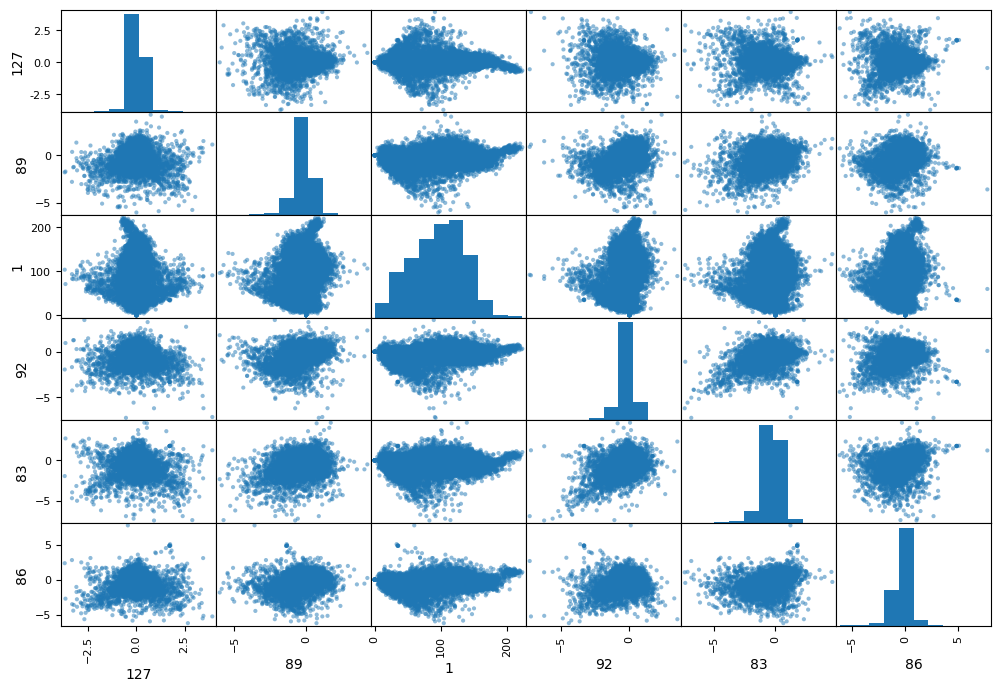

In [93]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr   
import numpy as np
from pandas.plotting import scatter_matrix

%matplotlib inline

training_targets = pd.DataFrame(y)
data = pd.DataFrame(X)
list_of_column_names = list(range(0,MFCC_NUM))

corr_dataf = dataframe

# Plot histograms for features 
#data.hist(bins=50,figsize=(20,15))

# Calculate the correlation for all features
list_of_correlation = corr_dataf[corr_dataf.columns[1:]].corr()['class'][:].tolist()

# Create dictionary of feature names and their correlations
correlation_dict = {list_of_column_names[i]: list_of_correlation[i] for i in range(len(list_of_column_names))}

# Sort the correlations and features names from highest correlation to lowest
sorted_correlation_dict = sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True)
# Select the top 5 correlations
sorted_correlation_dict = dict(sorted_correlation_dict[:6])

print("Top 5 features that correlate the most with the targets:")
print(sorted_correlation_dict.keys())

# Plot scatter matrix for top 5 features
attributes=list(sorted_correlation_dict.keys())
scatter_matrix(data[attributes],figsize=(12,8))

In [94]:
# split the targets and data into a training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

In [95]:
X_train.shape

(23130, 128)

In [96]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.76


In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.89


In [98]:
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score, accuracy_score


In [100]:
# construct a multi layer convolutional neural network
model = Sequential([
    # passive input layer, may or may not be weighted, input shape matches the shape of data and targets
    # input is given as array / tensor of 3 dimensions with 16 elements in the first dimension, 8 in the second and 1 in the third
    InputLayer(input_shape=(16, 8, 1)),
    # 2d convolutional layer with 32 output filters using the rectified linear unit activation function
    # the output has the same size as the input due to same padding and stride of 1
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    # downsamples the input by taking the maximum value over a 2*2 input window for each channel of the input
    # reduces the size of the audio
    MaxPooling2D(2, 2),
    # 2d convolutional layer with 64 output filters using the rectified linear unit activation function
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    # downsamples the input by taking the maximum value over a 2*2 input window for each channel of the input
    MaxPooling2D(2, 2),
    # flattens the input from a 3d  4 * 2 * 64 array into a sequential 512 array
    # cannot pass multidimensional array into a dense layer
    Flatten(),
    # densely connected neural network layer with an output dimensionalty of 32
    # classifies based on output from convolutional layers
    Dense(16, activation='relu'),
    # densely connected neural network layer with an output dimensionalty of 1.
    # the output neuron will contain a value from 0-1 where 0 for 1 class ('No dysarthria') and 1 for the other ('Dysarthria')
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 4, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [101]:
# configure the model for training using anoptimizer that uses the Adam algorithm
# the models accuracy is evaluated during training and testing
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
model_name = "model.h5"
# monitors the model's total loss and save the model considered the "best" 
# the "best" model is determined by minimizing the total loss  
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

# stop training the model when the model's total loss is improved on by any value > 0
# if no improvement occurs after 5 epochs then training will be stopped
# restores the model weights from the epoch with the best value
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [103]:
# fit the model to the training data using 50 iterations and use the testing data to validate it 
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50
709/723 [============================>.] - ETA: 0s - loss: 0.4663 - accuracy: 0.7807
Epoch 1: val_loss improved from inf to 0.52671, saving model to model.h5
723/723 [==============================] - 3s 3ms/step - loss: 0.4650 - accuracy: 0.7817 - val_loss: 0.5267 - val_accuracy: 0.7475
Epoch 2/50
716/723 [============================>.] - ETA: 0s - loss: 0.3545 - accuracy: 0.8425
Epoch 2: val_loss improved from 0.52671 to 0.35608, saving model to model.h5
723/723 [==============================] - 2s 3ms/step - loss: 0.3542 - accuracy: 0.8428 - val_loss: 0.3561 - val_accuracy: 0.8405
Epoch 3/50
708/723 [============================>.] - ETA: 0s - loss: 0.3026 - accuracy: 0.8718
Epoch 3: val_loss improved from 0.35608 to 0.30522, saving model to model.h5
723/723 [==============================] - 2s 3ms/step - loss: 0.3026 - accuracy: 0.8717 - val_loss: 0.3052 - val_accuracy: 0.8767
Epoch 4/50
723/723 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.8

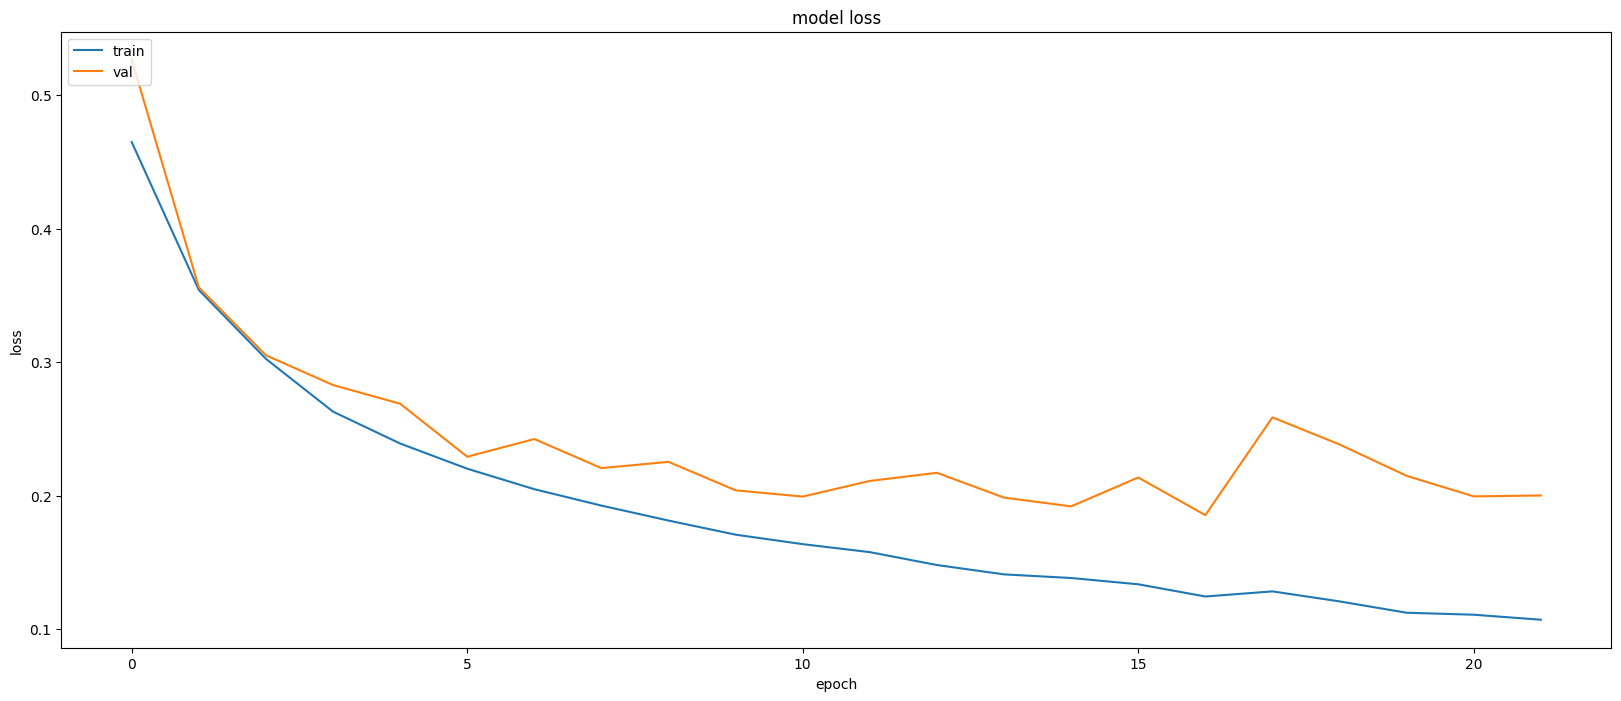

In [104]:
plt.figure(figsize=(20,8))
# loss is the value of cost function for the training data
plt.plot(history.history['loss'])
#val_loss is the value of cost function for the validation data
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

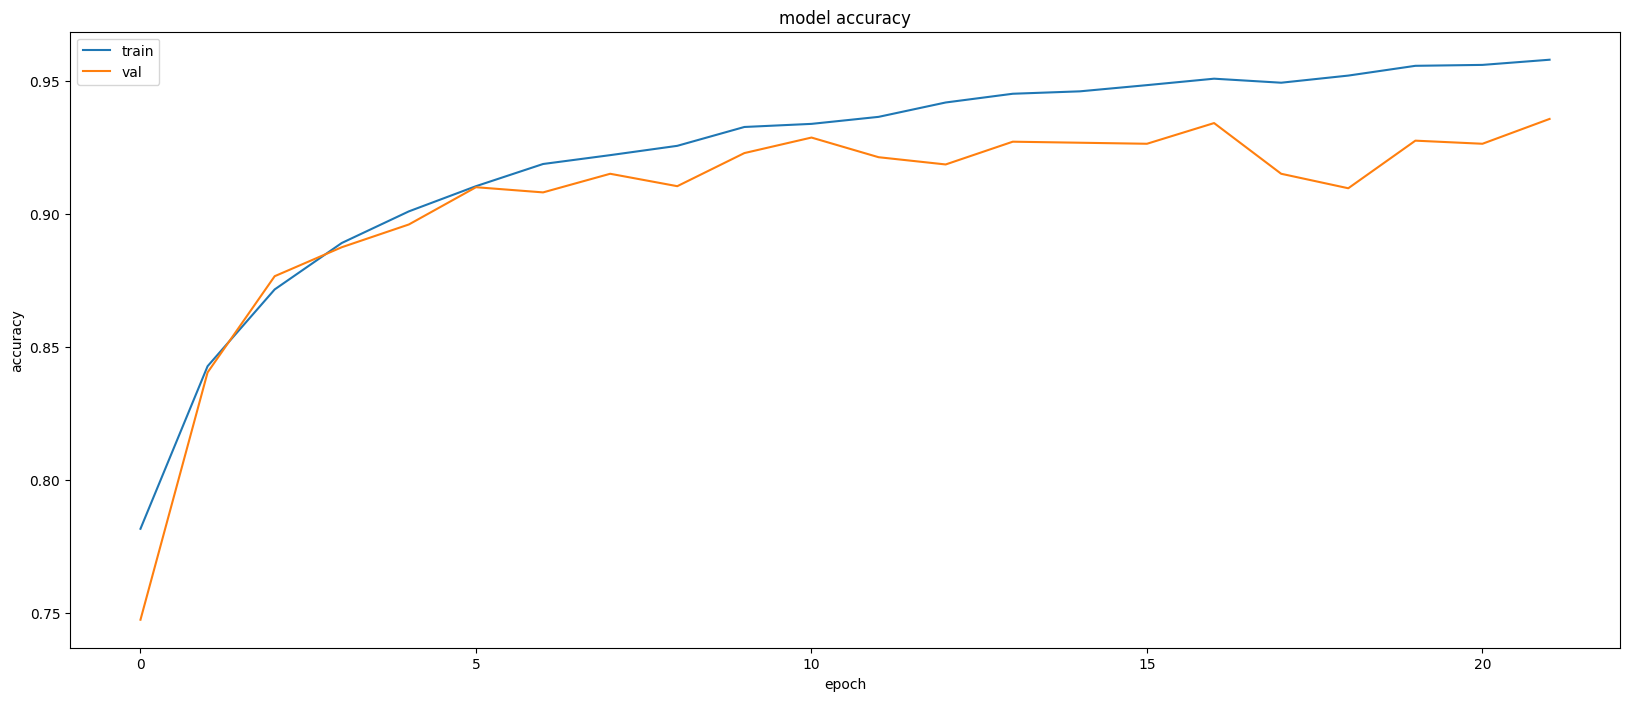

In [105]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [106]:
y_pred = model.predict(X_test)

81/81 [==============================] - 0s 856us/step


In [107]:
print(y_test)


1797     0.0
3002     1.0
9224     1.0
13505    1.0
20876    0.0
        ... 
2976     0.0
17624    0.0
2015     1.0
976      1.0
14910    1.0
Name: class, Length: 2570, dtype: float64


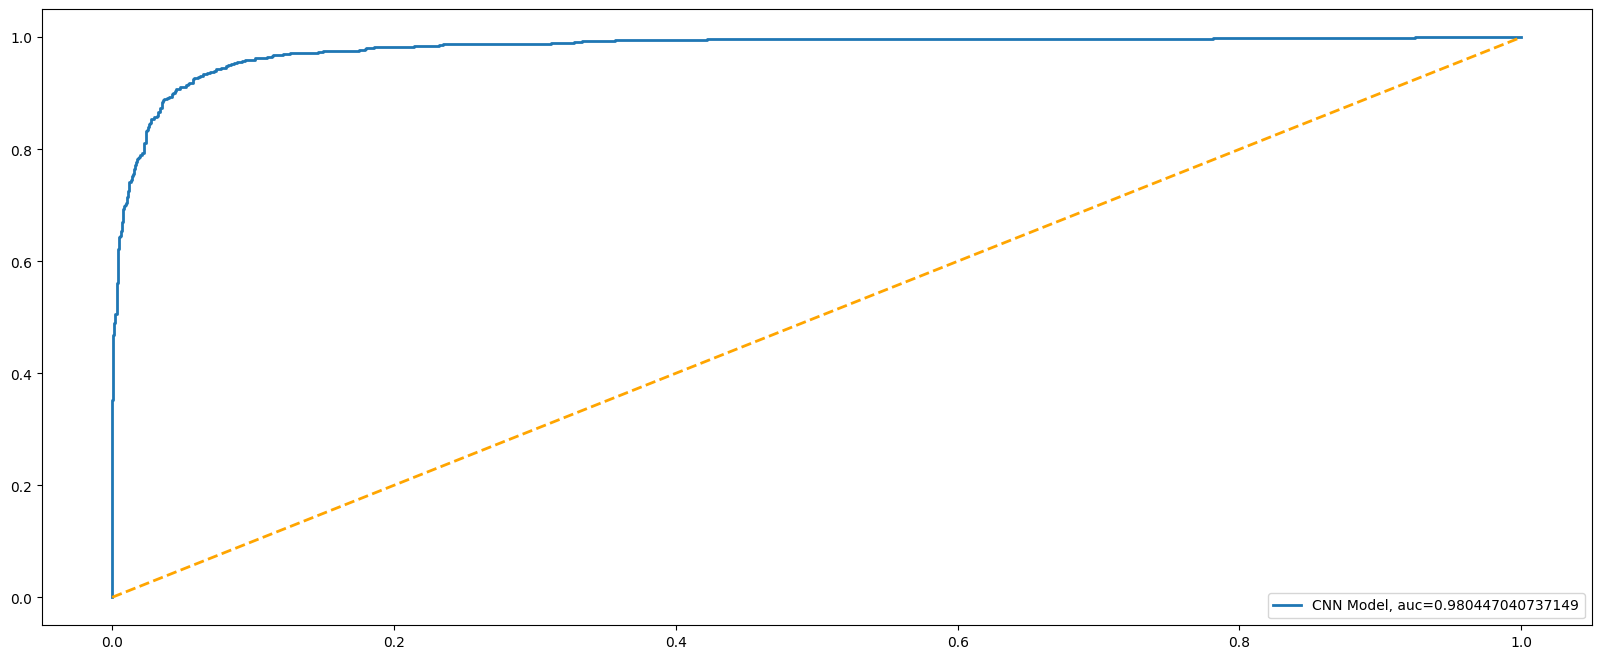

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [109]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

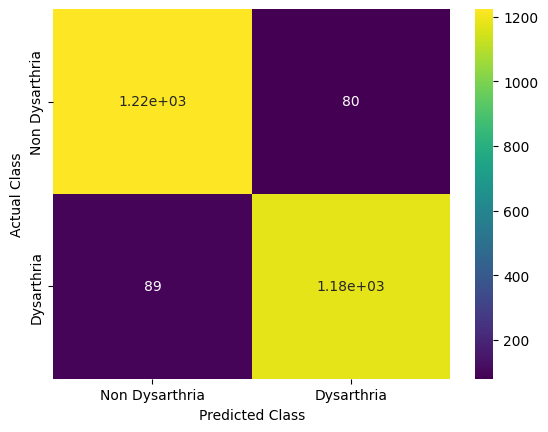

In [110]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1303
         1.0       0.94      0.93      0.93      1267

    accuracy                           0.93      2570
   macro avg       0.93      0.93      0.93      2570
weighted avg       0.93      0.93      0.93      2570



In [112]:
print("Recall Score of the Model: ",recall_score(y_test,y_pred))

Recall Score of the Model:  0.9297553275453828


In [113]:
print("Accuracy Score of the Model: ",accuracy_score(y_test,y_pred))

Accuracy Score of the Model:  0.9342412451361868


In [114]:
model.save('speech_model.h5')